# Motorcycle
Macro to test scatterplot smoothers: ksmooth, lowess, supsmu
as described in:

     Modern Applied Statistics with S-Plus, 3rd Edition
     W.N. Venables and B.D. Ripley
     Chapter 9: Smooth Regression, Figure 9.1

Example is a set of data on 133 observations of acceleration against time
for a simulated motorcycle accident, taken from Silverman (1985).




**Author:** Christian Stratowa, Vienna, Austria  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:48 AM.</small></i>

In [1]:
%%cpp -d
#include "TString.h"
#include "TInterpreter.h"
#include <fstream>
#include "TH1.h"
#include "TGraphSmooth.h"
#include "TCanvas.h"
#include "TSystem.h"


TCanvas *vC1;
TGraph *grin, *grout;

 A helper function is created: 

In [2]:
%%cpp -d
void DrawSmooth(Int_t pad, const char *title, const char *xt, const char *yt)
{
   vC1->cd(pad);
   TH1F *vFrame = gPad->DrawFrame(0,-130,60,70);
   vFrame->SetTitle(title);
   vFrame->SetTitleSize(0.2);
   vFrame->SetXTitle(xt);
   vFrame->SetYTitle(yt);
   grin->Draw("P");
   grout->DrawClone("LPX");
}

Data taken from r library mass: mcycle.txt

In [3]:
TString dir = gROOT->GetTutorialDir();
dir.Append("/graphs/");
dir.ReplaceAll("/./","/");

Read file and add to fit object

In [4]:
Double_t *x = new Double_t[133];
Double_t *y = new Double_t[133];
Double_t vX, vY;
Int_t vNData = 0;
ifstream vInput;
vInput.open(Form("%smotorcycle.dat",dir.Data()));
while (1) {
   vInput >> vX >> vY;
   if (!vInput.good()) break;
   x[vNData] = vX;
   y[vNData] = vY;
   vNData++;
}//while
vInput.close();
grin = new TGraph(vNData,x,y);

Draw graph

In [5]:
vC1 = new TCanvas("vC1","Smooth Regression",200,10,900,700);
vC1->Divide(2,3);

Kernel smoother
 create new kernel smoother and smooth data with bandwidth = 2.0

In [6]:
TGraphSmooth *gs = new TGraphSmooth("normal");
grout = gs->SmoothKern(grin,"normal",2.0);
DrawSmooth(1,"Kernel Smoother: bandwidth = 2.0","times","accel");

Redraw ksmooth with bandwidth = 5.0

In [7]:
grout = gs->SmoothKern(grin,"normal",5.0);
DrawSmooth(2,"Kernel Smoother: bandwidth = 5.0","","");

Lowess smoother
 create new lowess smoother and smooth data with fraction f = 2/3

In [8]:
grout = gs->SmoothLowess(grin,"",0.67);
DrawSmooth(3,"Lowess: f = 2/3","","");

Redraw lowess with fraction f = 0.2

In [9]:
grout = gs->SmoothLowess(grin,"",0.2);
DrawSmooth(4,"Lowess: f = 0.2","","");

Super smoother
 create new super smoother and smooth data with default bass = 0 and span = 0

In [10]:
grout = gs->SmoothSuper(grin,"",0,0);
DrawSmooth(5,"Super Smoother: bass = 0","","");

Redraw supsmu with bass = 3 (smoother curve)

In [11]:
grout = gs->SmoothSuper(grin,"",3);
DrawSmooth(6,"Super Smoother: bass = 3","","");

Cleanup

In [12]:
delete [] x;
delete [] y;
delete gs;

Draw all canvases 

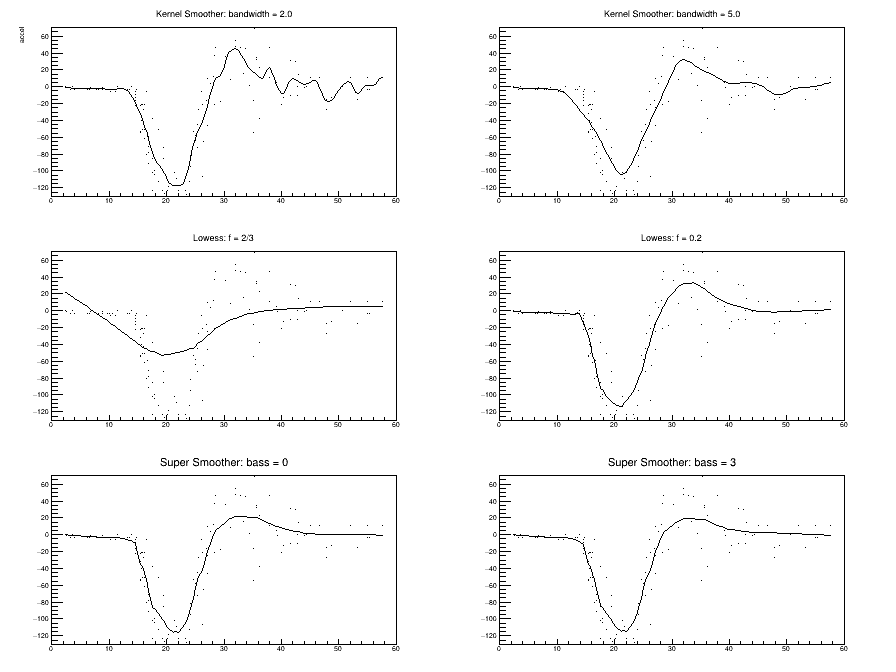

In [13]:
gROOT->GetListOfCanvases()->Draw()